# Graphs in this notebook only work for running "ALL" target in Github page. If running the "test" target, do not run this notebook. Because if you run that, the graphs in this notebook will be not representative to our analysis result

### Read Data Sets

The data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
nzerom=pd.read_csv('test/output/nonzero_M.csv')
zerom=pd.read_csv('test/output/zero_M.csv')
nzerom['M']=np.log(nzerom['M'])
zerom['M']=np.log(zerom['M']+1)

nzerom['views']=np.log(nzerom['views'])
zerom['views']=np.log(zerom['views'])

nzerom['sentiment_score']=abs(nzerom['sentiment_score'])
zerom['sentiment_score']=abs(zerom['sentiment_score'])

nzero_title=nzerom.groupby('title').agg({'revert':'mean', 
                         'views':'mean', 
                         'sentiment_score':'mean', 
                         'M': 'mean'})

zero_title=zerom.groupby('title').agg({'revert':'mean', 
                         'views':'mean', 
                         'sentiment_score':'mean', 
                         'M': 'mean'})

### M vs Sentiment

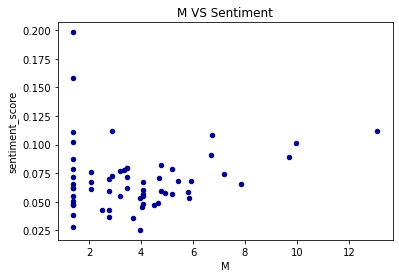

In [3]:
nzero_title.plot.scatter(x='M',
                      y='sentiment_score',
                      c='DarkBlue',
                       title='M VS Sentiment')

Text(0, 0.5, 'Comment Counts')

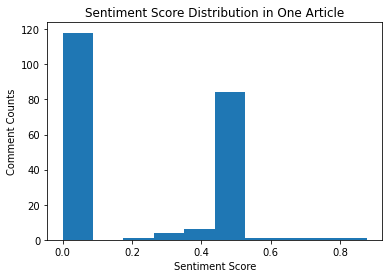

In [4]:
#example of Wooster Ohio
zerom_withsen=zerom.loc[zerom['title']=='Wooster, Ohio']['sentiment_score']
plt.hist(zerom_withsen)
plt.title('Sentiment Score Distribution in One Article')
plt.xlabel('Sentiment Score') 
plt.ylabel('Comment Counts')

### Pageview vs Sentiment/M

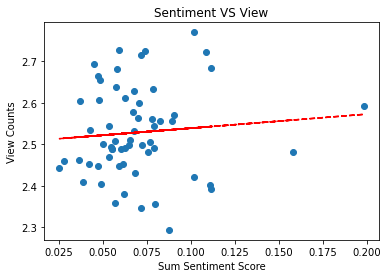

In [6]:
#relationship between pageview and sentiment score
all_views=nzerom.groupby('title').mean()
all_views['views']=np.log(all_views['views'])
y=all_views['views']
x=all_views['sentiment_score']
plt.scatter(y=abs(y),x=abs(x))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.xlabel('Sum Sentiment Score')
plt.ylabel('View Counts')
plt.title('Sentiment VS View')
plt.savefig('Sentiment vs View.png')

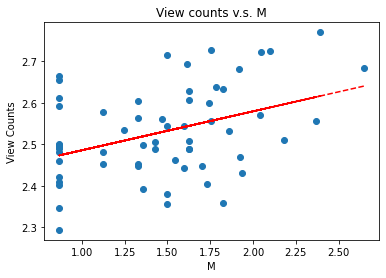

In [7]:
logm = all_views.copy()
logm['M'] = np.log(logm['M']+1)
y=logm['views']
x=logm['M']
plt.scatter(y=abs(y),x=abs(x))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.xlabel('M')
plt.ylabel('View Counts')
plt.title('View counts v.s. M')
plt.savefig('Viewcounts v.s. M.png')

### Weighted Sum vs M

In [11]:
def weighted_sum(revert,views,sentiment,M):
    return views*(revert+sentiment)+M

In [12]:
#merge with our dataframe
with_weighted=zero_title.apply(lambda x: weighted_sum(x['revert'],x['views'],x['sentiment_score'],x['M']), axis=1)
zero_title['Weighted_sum']=with_weighted

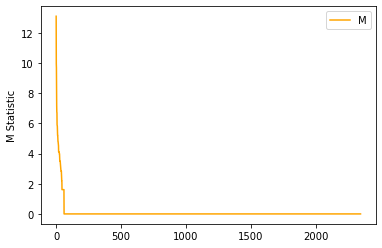

In [13]:
prev=zero_title['M'].sort_values(ascending=False)
after=zero_title['Weighted_sum'].sort_values(ascending=False)
Ax=range(zero_title.shape[0])
plt.plot(Ax,prev,label='M',c='orange')
plt.legend(loc="upper right")
plt.ylabel('M Statistic')
plt.show()

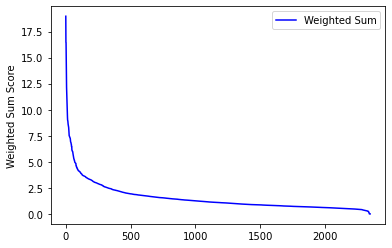

In [14]:
prev=zero_title['M'].sort_values(ascending=False)
after=zero_title['Weighted_sum'].sort_values(ascending=False)
Ax=range(zero_title.shape[0])
plt.plot(Ax,after,label='Weighted Sum',c='blue')
plt.legend(loc="upper right")
plt.ylabel('Weighted Sum Score')
plt.show()